### Sin agua

Number of images detected: 9


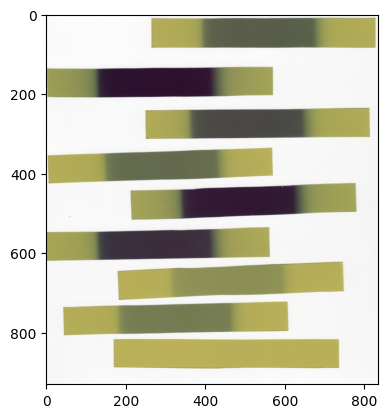

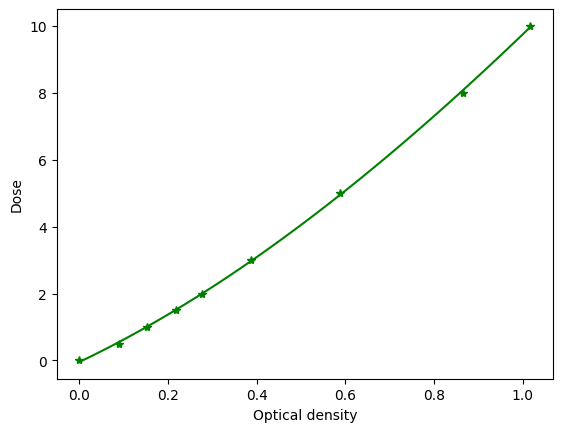

(930, 836, 3)

In [54]:
#from Dosepy.tools.image import load
from image import load
from pathlib import Path

imparted_doses = [0, 0.5, 1,1.5, 2, 3, 5, 8, 10]

file_path_sin = Path("/home/luis/Documents/GitHub/Dosepy/src/Dosepy/data") / "PRUEBA_LUIS.tif"  # Office PC
#file_path_sin = Path("/home/luis/Dosepy/src/Dosepy/data") / "PRUEBA_LUIS.tif" # Personal laptop
cal_image_sin = load(file_path_sin, for_calib = True)
cal_sin = cal_image_sin.get_calibration(doses = imparted_doses, channel = "G", field_in_film = True)
cal_image_sin.plot()
cal_sin.plot(color = 'green')

cal_image_sin.array.shape

### Con agua

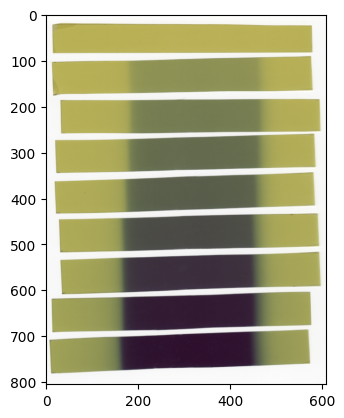

Number of images detected: 9


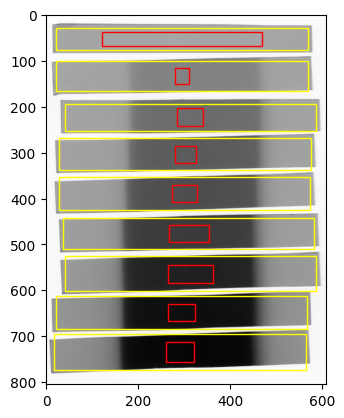

Number of images detected: 9


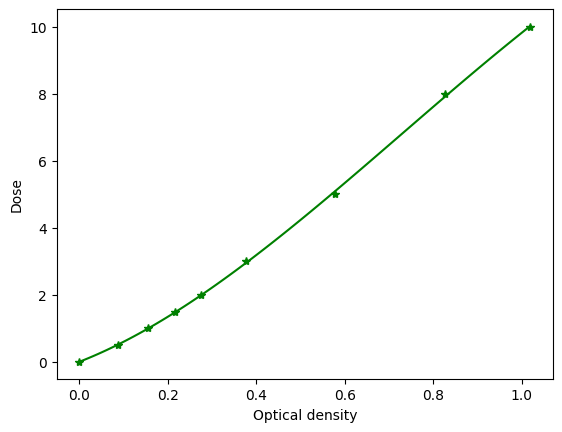

<Axes: xlabel='Optical density', ylabel='Dose'>

In [40]:
#file_path_agua = Path("/home/luis/Descargas") / "agua.tif"
file_path_agua = Path("/home/luis/Downloads") / "agua.tif"
cal_image_agua = load(file_path_agua, for_calib = True)
cal_image_agua.plot()
cal_image_agua.get_stat(ch = 'G', field_in_film = True, ar = 0.4, show = True, threshold = 0.8)
cal_agua = cal_image_agua.get_calibration(doses = imparted_doses, channel = "G", field_in_film = True, threshold = 0.8)
cal_agua.plot(color = 'green')

## Dosis inferir (FAIL It is needed a reference film in the tif image)

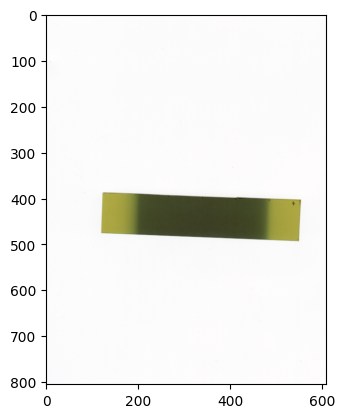

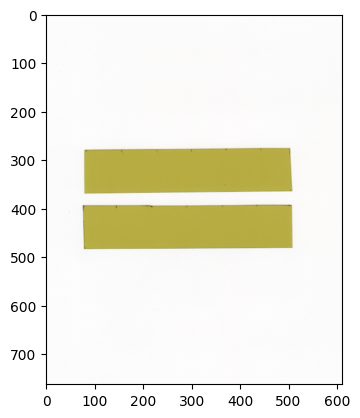

<Axes: >

In [14]:
#inferir_path = Path("/home/luis/Descargas") / "dosis inferir.tif"
inferir_path = Path("/home/luis/Downloads") / "dosis inferir.tif"
inf_pre_path = Path("/home/luis/Downloads") / "pre.tif"
inferir_img = load(inferir_path)
inf_pre_img = load(inf_pre_path)

inferir_img.plot()
inf_pre_img.plot()
#dose_sin = inferir_img.to_dose(cal_sin)
#dose_agua = inferir_img.to_dose(cal_agua)

### Load the images using OMG_Dosimetry

We need to stack the "dosis inferir.tiff" with "pre,tif".

Loading: /home/luis/Downloads/pre.tif
Loading: /home/luis/Downloads/dosis inferir.tif


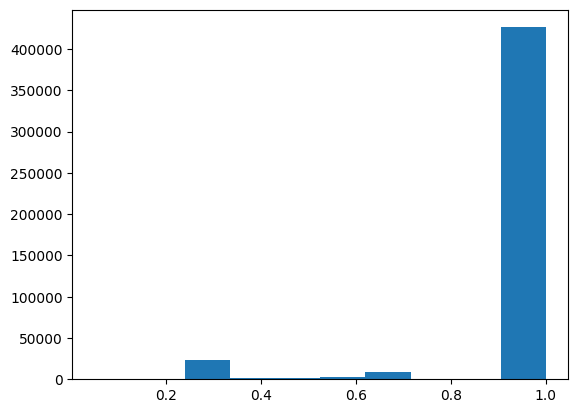

In [60]:
from omg_dosimetry.imageRGB import stack_images, equate_images, load
#from pylinac.core.image import equate_image

inf_pre_img = load(Path("/home/luis/Downloads") / "pre.tif")

plt.hist(pre_img.array[:,:,1].ravel())

inferir_img = load(Path("/home/luis/Downloads") / "dosis inferir.tif")


(array([1.10000e+01, 7.80000e+01, 2.31030e+04, 1.70400e+03, 1.43000e+03,
        3.36400e+03, 8.65100e+03, 2.97000e+02, 3.64000e+02, 4.26428e+05]),
 array([0.0502327 , 0.14520943, 0.24018616, 0.33516289, 0.43013962,
        0.52511635, 0.62009308, 0.71506981, 0.81004654, 0.90502327,
        1.        ]),
 <BarContainer object of 10 artists>)

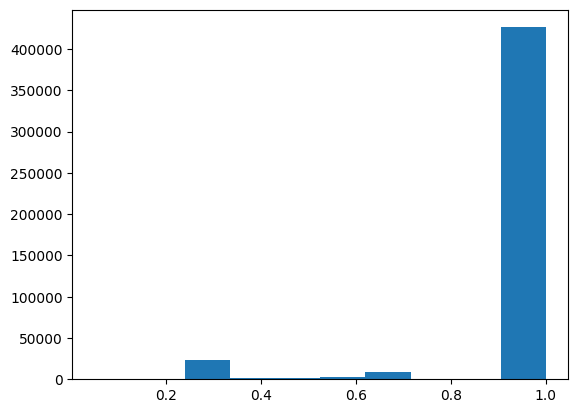

In [59]:
pre_img, post_img = equate_images(inferir_img, inf_pre_img)

#inf_img_v2 = stack_images([inferir_img.array, inf_pre_img.array])

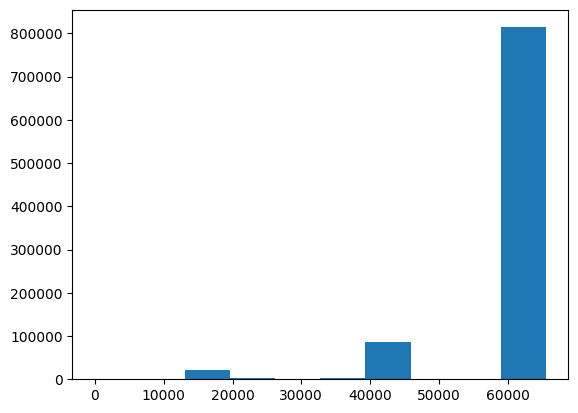

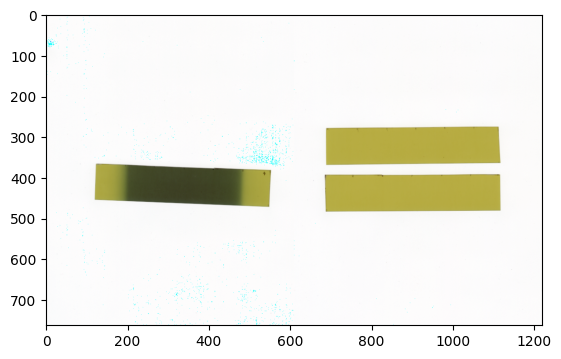

In [68]:
inf_img_v2 = stack_images([pre_img, post_img])
inf_img_v2.array = np.array(inf_img_v2.array*2**16, dtype = 'uint16')

plt.hist(inf_img_v2.array[:,:,1].ravel())

inf_img_v2.plot()

In [69]:
import tifffile as tif

tif.imwrite('temp.tif', inf_img_v2.array, resolution=(75, 75), dtype = 'uint16')

## Use of combined image made by OMG_Dosimetry and tifffile

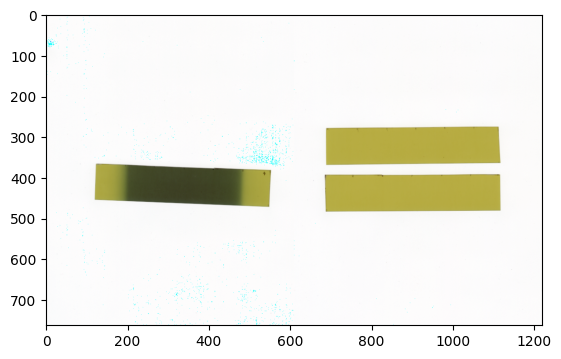

<Axes: >

In [74]:
from image import load
#test_img = load(Path("/home/luis/Downloads") / "Combined Stacks.tif")
test_img = load(Path("/home/luis/Downloads") / "temp.tif")
test_img.plot()

Number of images detected: 3


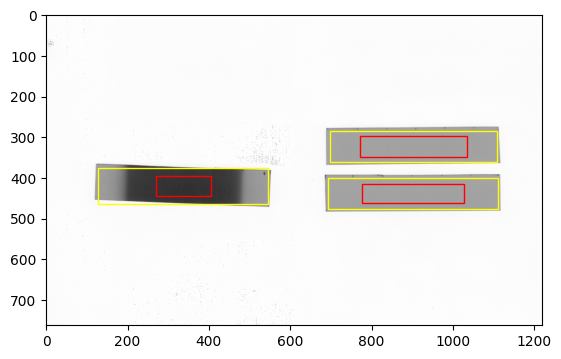

([43971, 16918, 44267], [3169, 557, 189])

In [82]:
test_img.get_stat(ch = 'G', field_in_film = True, ar = 0.4, show = True, threshold = 0.8)

Number of images detected: 3
Number of images detected: 3


/home/luis/Documents/GitHub/Dosepy/src/Dosepy/tools/image.py:430: RuntimeWarning: divide by zero encountered in log10
  optical_density = -np.log10(self.array[:,:,1]/mean_pixel[1])
/home/luis/Documents/GitHub/Dosepy/src/Dosepy/tools/calibration.py:20: RuntimeWarning: invalid value encountered in add
  return a + b*x + c*x**2 + d*x**3


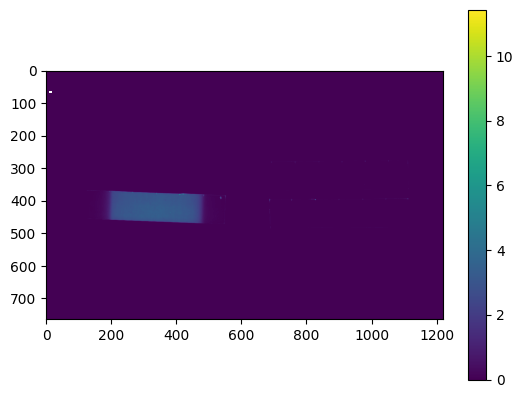

In [75]:
dose_img_sin = test_img.to_dose(cal_sin)
dose_img_con = test_img.to_dose(cal_agua)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(ncols=1)

# plot and save the
# color "mappable" object returned by ax1.imshow
pos = ax.imshow(dose_img_sin)

# add the colorbar using the figure's method,
# telling which mappable we're talking about and
# which axes object it should be near
fig.colorbar(pos, ax=ax)

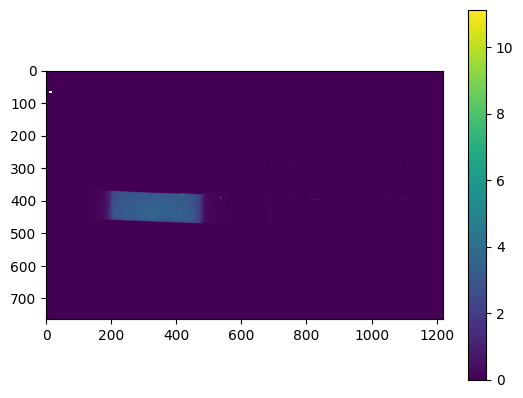

In [76]:
fig, ax = plt.subplots(ncols=1)

# plot and save the
# color "mappable" object returned by ax1.imshow
pos = ax.imshow(dose_img_con)

# add the colorbar using the figure's method,
# telling which mappable we're talking about and
# which axes object it should be near
fig.colorbar(pos, ax=ax)

(array([6.00000e+00, 2.70000e+01, 2.09450e+04, 3.52500e+03, 1.43700e+03,
        2.97200e+03, 8.53520e+04, 1.38100e+03, 1.20400e+03, 8.14011e+05]),
 array([    0. ,  6553.4, 13106.8, 19660.2, 26213.6, 32767. , 39320.4,
        45873.8, 52427.2, 58980.6, 65534. ]),
 <BarContainer object of 10 artists>)

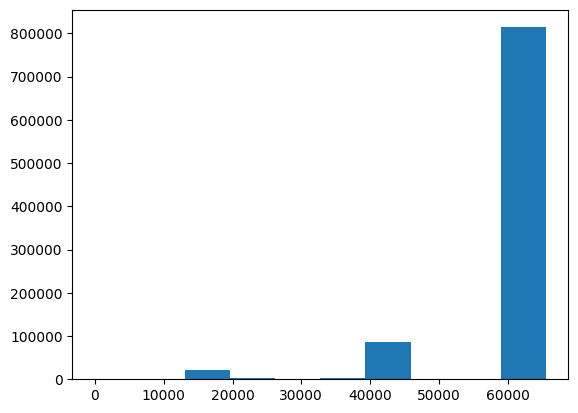

In [77]:
plt.hist(test_img.array[:,:,1].ravel())

(763, 1220, 3)
Number of images detected: 3


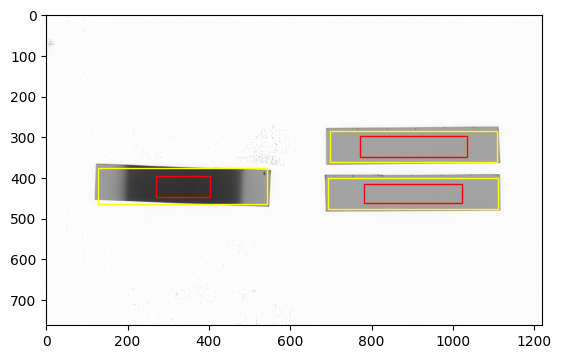

[0.         0.         3.25857833]
[0.00497807 0.01644936 3.37068485]


In [81]:
import numpy as np
from calibration import polynomial_g3

print(test_img.array.shape)

mean_pixel, _ = test_img.get_stat(ch = "G", field_in_film = True, ar = 0.4, show = True)
mean_pixel = sorted(mean_pixel, reverse = True)
#mean_pixel

optical_density = -np.log10(np.array(mean_pixel)/mean_pixel[0])

dosis_from_fit_sin = polynomial_g3(optical_density, *cal_sin.popt)
dosis_from_fit_sin[dosis_from_fit_sin < 0] = 0 # Remove doses < 0

dosis_from_fit_con = polynomial_g3(optical_density, *cal_agua.popt)
dosis_from_fit_con[dosis_from_fit_con < 0] = 0 # Remove doses < 0

print(dosis_from_fit_sin)
print(dosis_from_fit_con)

## Threshold fail

Not enough whie pixels?

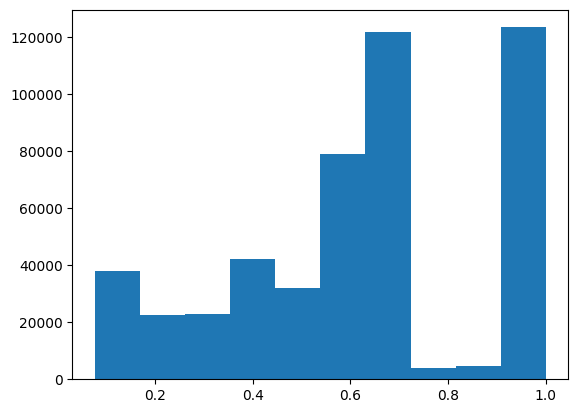

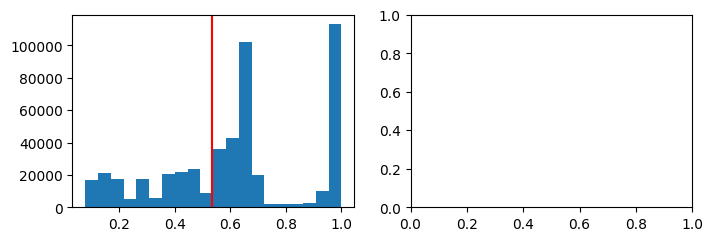

In [83]:
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu

grayscale = rgb2gray(cal_image_agua.array)
plt.hist(grayscale.ravel())

thresh = threshold_otsu(grayscale)

fig, axes = plt.subplots(ncols=2, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 2, 1)
ax[1] = plt.subplot(1, 2, 2)

ax[0].hist(grayscale.ravel(), bins = 20)
ax[0].axvline(thresh, color='r')